In [1]:
import numpy as np
import pandas as pd
import pickle

import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from cfg_global import project_folder_path
from spike_train_utils import get_lv
os.chdir(current_wd)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
dataset_folder = project_folder_path + 'results\\synthetic\\dataset\\'
results_folder = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha\\'
fig_folder = project_folder_path + 'results\\synthetic\\fig_drafts_paper\\'

In [3]:
with open(dataset_folder + 'spike_trains_tau100ms_alpha_var_fr_var_len600sec_1000.pkl','rb') as f:
    data = pickle.load(f)

all_spike_trains = data['spike_trains']
alphas = data['alphas']
fr_values = data['fr_values']

print(f'n spike trains {len(all_spike_trains)}, len {all_spike_trains[0][-1]/1000}')

n spike trains 1000, len 599.9662583268864


In [5]:
lv_l = []
for spike_train in all_spike_trains:
    spike_train_int = np.asarray([int(spike) for spike in spike_train])
    lv = get_lv(spike_train_int, False)
    lv_l.append(lv)

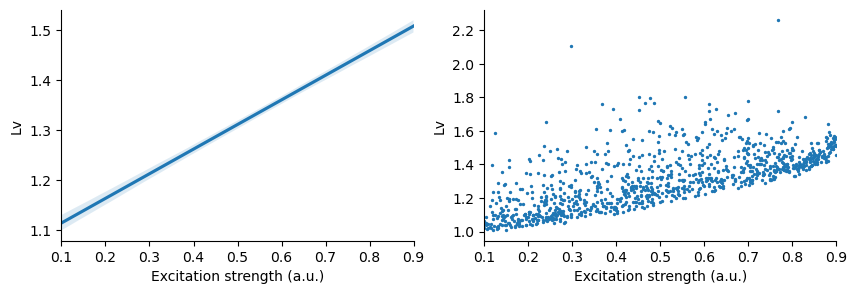

In [6]:
fig, axes = plt.subplots(1,2, figsize=(10, 3), sharey=False)

sns.regplot(x=alphas, y=lv_l, scatter=None, ax=axes[0])

axes[1].scatter(alphas, lv_l, s=2)

# axes[0].set_xlabel('Firing rate (Hz)')
# axes[1].set_xlabel('Excitation strength (a.u.)')

for ax in axes.flat:
    ax.set_xlabel('Excitation strength (a.u.)')
    ax.set_ylabel('Lv')
    ax.set_xlim([0.1, 0.9])

sns.despine()


plt.savefig(fig_folder + 'taus_dataset_fr_alpha_var_lv_1000.png' , bbox_inches='tight', dpi=300)
plt.savefig(fig_folder + 'taus_dataset_fr_alpha_var_lv_1000.svg' , bbox_inches='tight')

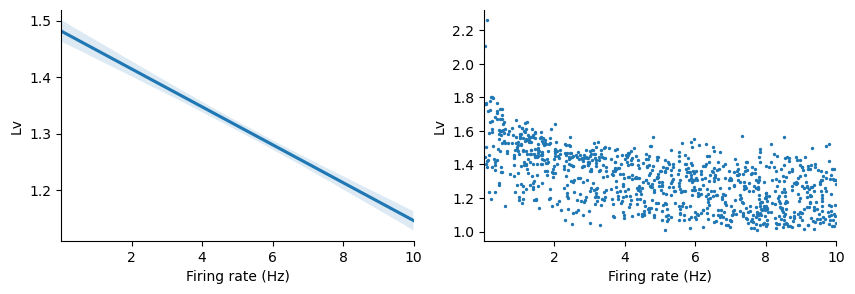

In [10]:
fig, axes = plt.subplots(1,2, figsize=(10, 3), sharey=False)

sns.regplot(x=fr_values, y=lv_l, scatter=None, ax=axes[0])

axes[1].scatter(fr_values, lv_l, s=2)

# axes[0].set_xlabel('Firing rate (Hz)')
# axes[1].set_xlabel('Excitation strength (a.u.)')

for ax in axes.flat:
    ax.set_xlabel('Firing rate (Hz)')
    ax.set_ylabel('Lv')
    ax.set_xlim([0.01, 10])

sns.despine()


# plt.savefig(fig_folder + 'taus_dataset_fr_alpha_var_lv_1000.png' , bbox_inches='tight', dpi=300)
# plt.savefig(fig_folder + 'taus_dataset_fr_alpha_var_lv_1000.svg' , bbox_inches='tight')